### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	**Aprendizaje profundo: Redes neuronales**
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.



# Laboratorio Parte 2: Keras, MNIST data y redes neuronales convolucionales (CNN)

In [0]:
# importo librerias necesarias     
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

## Exploración del dataset

In [0]:
# dimensiones de la data
print(f"Imagenes de Entrenamiento: {mnist.train.images.shape}")
print(f"Labels de Entrenamiento: {mnist.train.labels.shape}")

print(f"Imagenes de Testeo: {mnist.test.images.shape}")
print(f"Labels de Testeo: {mnist.test.labels.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento: (55000, 10)
Imagenes de Testeo: (10000, 784)
Labels de Testeo: (10000, 10)


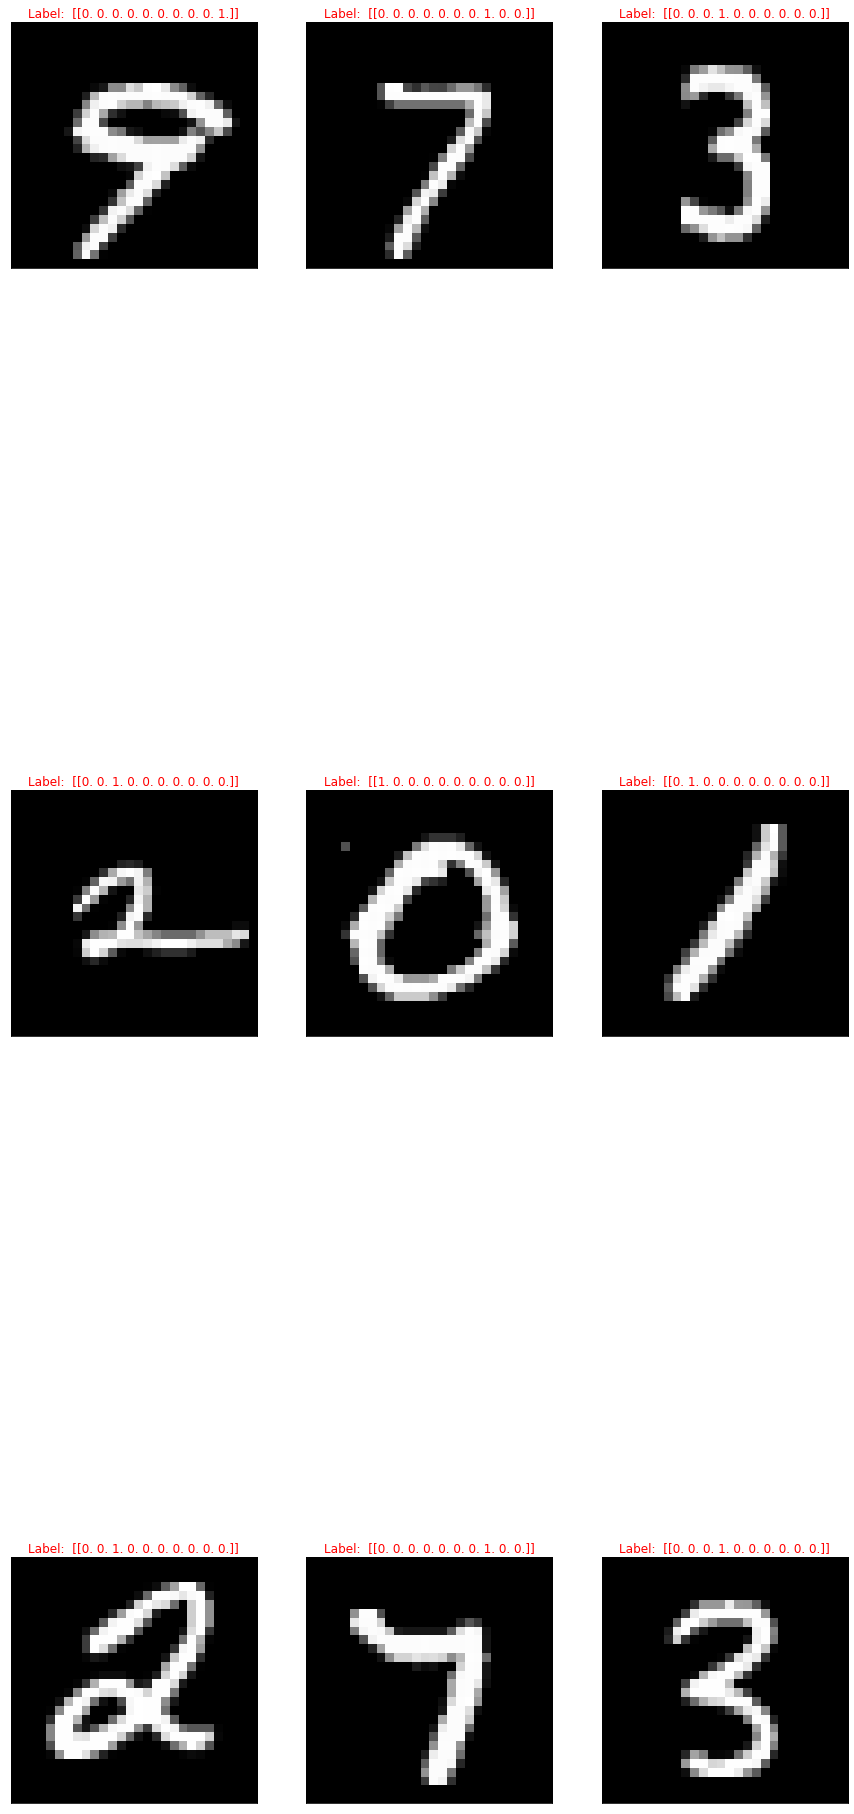

In [0]:
# visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=55000, size=1)

       ax[i,j].imshow(mnist.train.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Label:  ' + str(mnist.train.labels[random_image]), color='r')


#fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Definición y entrenamiento del Modelo

In [0]:
X_train, y_train = mnist.train.images, mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels

In [0]:
X_train, X_test = X_train.reshape(55000, 28, 28, 1), X_test.reshape(10000, 28, 28, 1)

### Documentación de Keras: https://keras.io/

In [0]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida
### Utilizar funciones Input(), Dense()

entrada = Input(shape=(28,28,1))

conv1 = Conv2D(64, 5,activation="relu")(entrada)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 5,activation="relu")(maxPool1)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense2 = Dense(64, activation="sigmoid")(dense1)
salida = Dense(10, activation="softmax")(dense2)


###

In [0]:
### A completar: definir entrada y salida del modelo

model = Model(inputs=entrada, outputs=salida)

###

In [0]:
### A completar: definir optimizador y funcion de costo

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###

In [0]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=1, save_best_only=True)

In [0]:
history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=1, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/10





55000/55000 [==============================] - 180s 3ms/step - loss: 0.1681 - acc: 0.9596 - val_loss: 0.0400 - val_acc: 0.9889

Epoch 00001: loss improved from inf to 0.16815, saving model to prueba1.h5
Epoch 2/10
55000/55000 [==============================] - 176s 3ms/step - loss: 0.0380 - acc: 0.9891 - val_loss: 0.0309 - val_acc: 0.9899

Epoch 00002: loss improved from 0.16815 to 0.03803, saving model to prueba1.h5
Epoch 3/10
55000/55000 [==============================] - 175s 3ms/step - loss: 0.0256 - acc: 0.9922 - val_loss: 0.0227 - val_acc: 0.9924

Epoch 00003: loss improved from 0.03803 to 0.02558, saving model to prueba1.h5
Epoch 4/10
55000/55000 [==============================] - 175s 3ms/step - loss: 0.0184 - acc: 0.9947 - val_loss: 0.0356 - val_acc: 0.9888

Epoch 00004: loss improved from 0.02558 to 0.01843, saving 

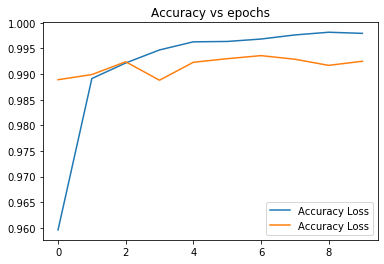

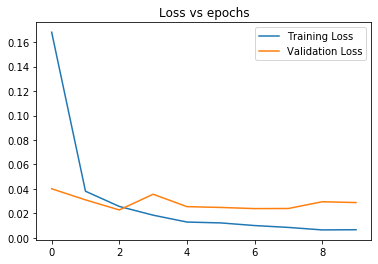

In [0]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

## Usemos este modelo para hacer predicciones

In [0]:
## A completar: utilizar imagenes de testeo

predicciones = model.predict(X_test)

##

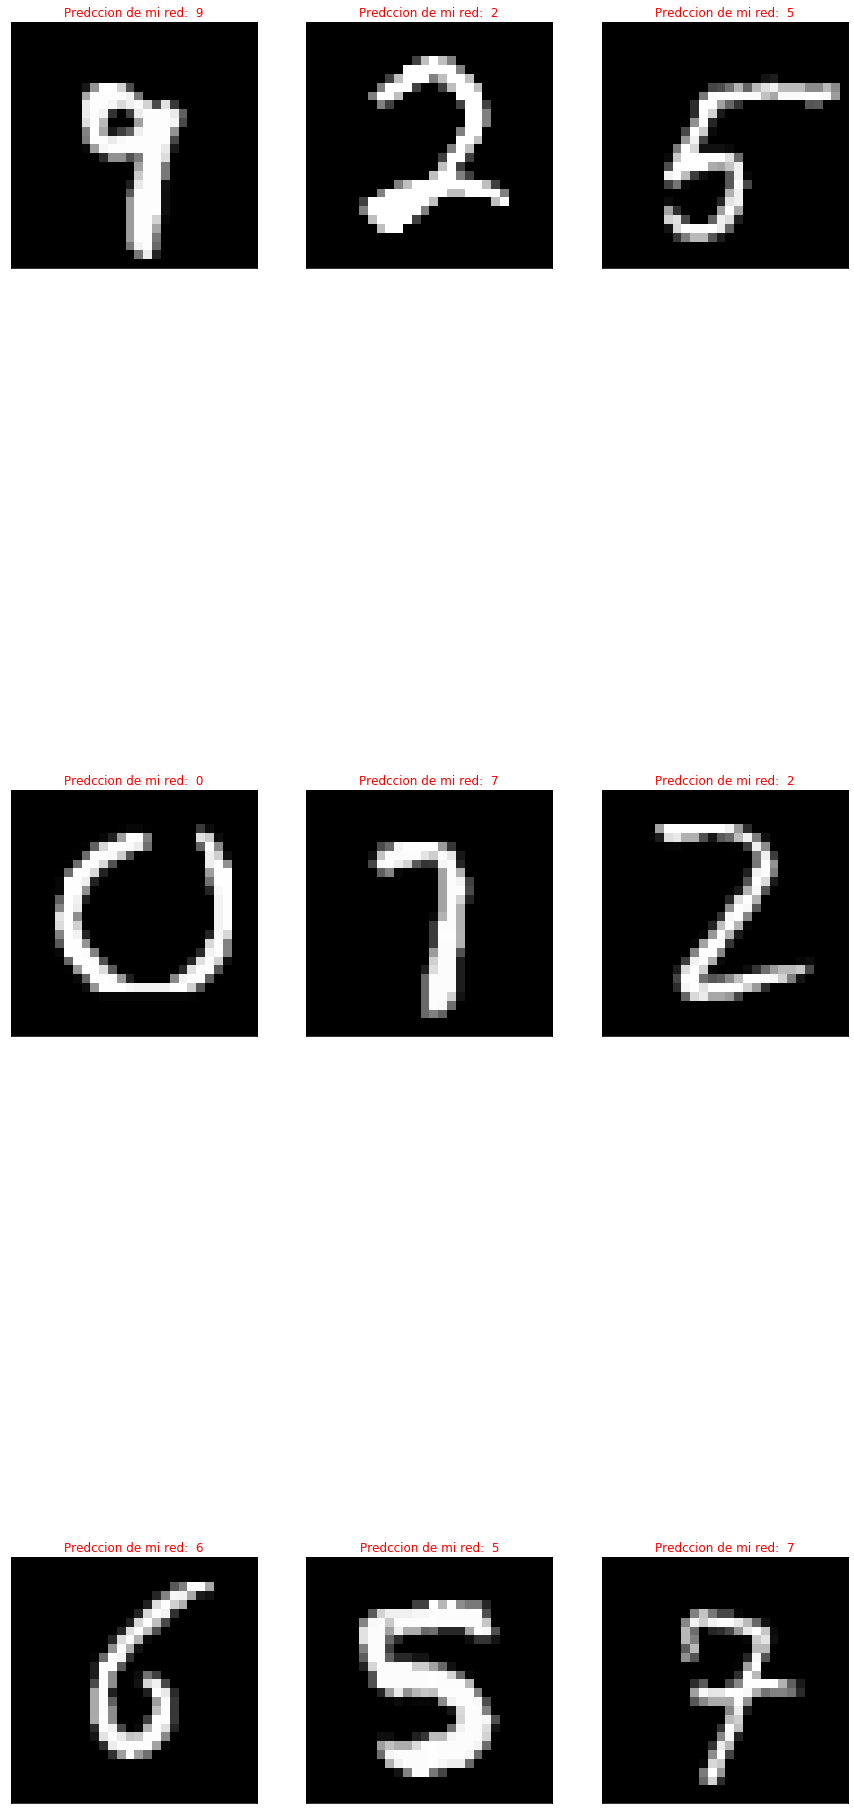

In [0]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(predicciones[random_image])), color='r')

plt.show()